# Understanding App Usage Patterns — An Exploratory Analysis of Waze User Churn


#> 📂 **Dataset Source**  
>  
> This project uses a sample Waze dataset based on simulated user activity, provided as part of the Google Advanced Data Analytics program.  
> The file `waze_data.csv` is included in this repository for reproducibility.


This notebook continues the Waze user churn analysis by conducting structured exploratory data analysis (EDA). The goal is to visualize usage patterns and identify behavioral signals that correlate with churn.

# **Exploratory data analysis**

The project focuses on uncovering patterns in the Waze dataset through EDA techniques such as descriptive statistics, data visualization, and comparison between retained and churned users. It builds on earlier data preparation steps and leads toward a structured executive summary based on insights gained.

# **Visualize a story in Python**

## Project Planning
This project investigates user churn behavior using app activity data.

### Step 1: Load data and import libraries

This project uses pandas, numpy, matplotlib, and seaborn for data exploration and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data into a DataFrame called `df`.

In [3]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## Exploratory Data Analysis


### Step 2: Data exploration and cleaning

The dataset was explored to identify relevant features, handle missing values, and detect potential outliers.  
Columns unrelated to churn behavior were excluded from the analysis.


#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1. A box plot can help detect outliers in a single variable, like drives. Also a scatter plot (e.g. drives vs sessions) can show outliers in relationships between variables

2. 
- It depends on the type of outlier:

- If it’s a global outlier and clearly an error, it's best to remove it.

- If the value is valid but extreme, and it affects the story or model accuracy, we can replace it with the median or cap it.

- If it reflects real behavior, we might choose to keep it to preserve data integrity.

### Step 3: Visualizations

A set of visualizations was created to explore user activity, retention patterns, and churn behavior. These included box plots, histograms, and scatter plots to illustrate feature distributions and relationships.


Most helpful visualizations:

- Box plot – Useful for detecting outliers in a single variable like drives.

- Scatter plot – Helps visualize the relationship between drives and sessions, and spot potential outliers across both variables.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

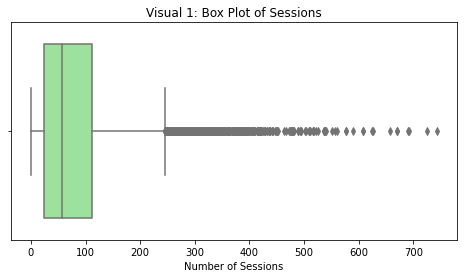

In [8]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['sessions'], color='lightgreen')
plt.title('Visual 1: Box Plot of Sessions')
plt.xlabel('Number of Sessions')
plt.show()

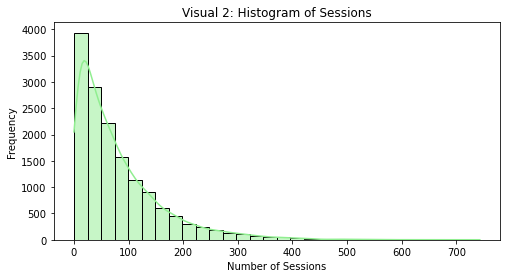

In [9]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['sessions'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 2: Histogram of Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.savefig("visuals/hist_sessions.png", dpi=300, facecolor="white")
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

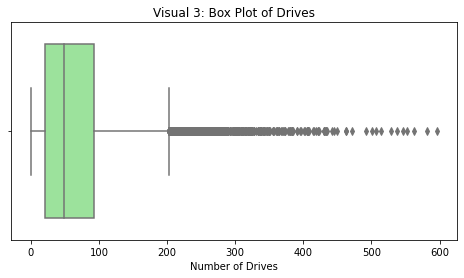

In [10]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['drives'], color='lightgreen')
plt.title('Visual 3: Box Plot of Drives')
plt.xlabel('Number of Drives')
plt.show()

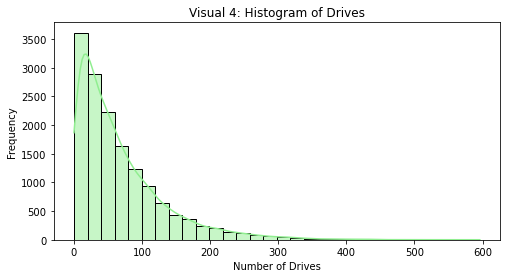

In [11]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['drives'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 4: Histogram of Drives')
plt.xlabel('Number of Drives')
plt.ylabel('Frequency')
plt.savefig("visuals/hist_drives.png", dpi=300, facecolor="white")
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

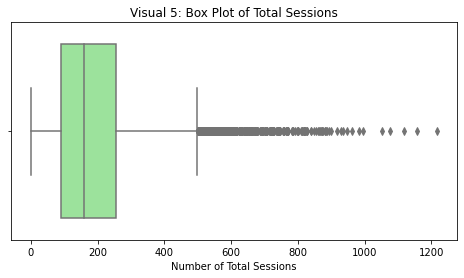

In [12]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['total_sessions'], color='lightgreen')
plt.title('Visual 5: Box Plot of Total Sessions')
plt.xlabel('Number of Total Sessions')
plt.show()

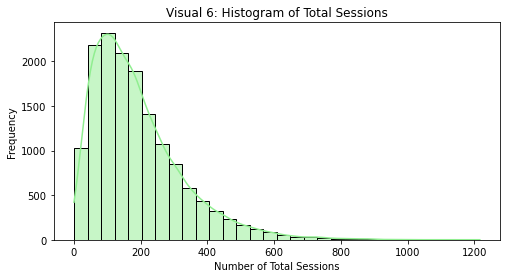

In [13]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['total_sessions'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 6: Histogram of Total Sessions')
plt.xlabel('Number of Total Sessions')
plt.ylabel('Frequency')
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

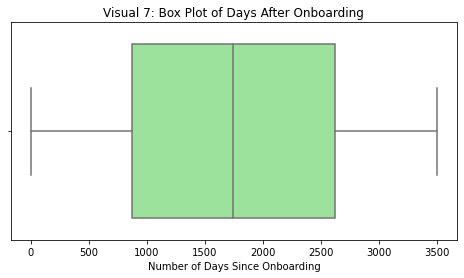

In [14]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['n_days_after_onboarding'], color='lightgreen')
plt.title('Visual 7: Box Plot of Days After Onboarding')
plt.xlabel('Number of Days Since Onboarding')
plt.show()

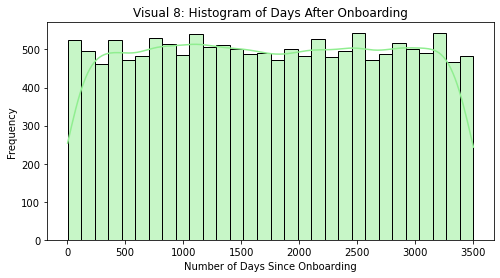

In [15]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['n_days_after_onboarding'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 8: Histogram of Days After Onboarding')
plt.xlabel('Number of Days Since Onboarding')
plt.ylabel('Frequency')
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

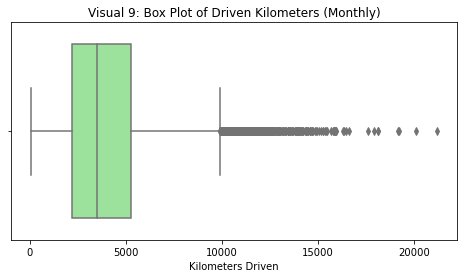

In [16]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['driven_km_drives'], color='lightgreen')
plt.title('Visual 9: Box Plot of Driven Kilometers (Monthly)')
plt.xlabel('Kilometers Driven')
plt.show()

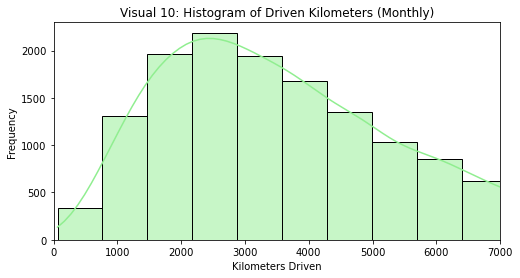

In [17]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['driven_km_drives'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 10: Histogram of Driven Kilometers (Monthly)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.savefig("visuals/hist_km_monthly.png", dpi=300, facecolor="white")
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

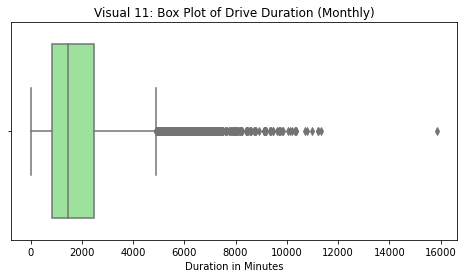

In [18]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_minutes_drives'], color='lightgreen')
plt.title('Visual 11: Box Plot of Drive Duration (Monthly)')
plt.xlabel('Duration in Minutes')
plt.show()

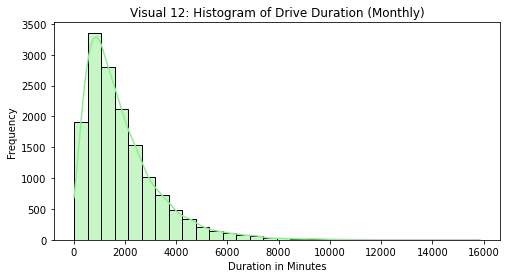

In [19]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['duration_minutes_drives'], bins=30, kde=True, color='lightgreen')
plt.title('Visual 12: Histogram of Drive Duration (Monthly)')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

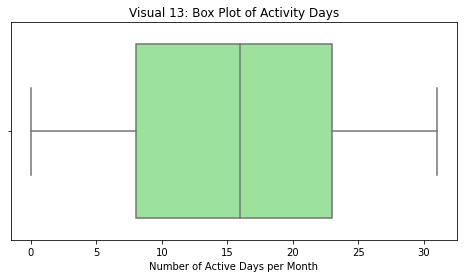

In [20]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['activity_days'], color='lightgreen')
plt.title('Visual 13: Box Plot of Activity Days')
plt.xlabel('Number of Active Days per Month')
plt.show()

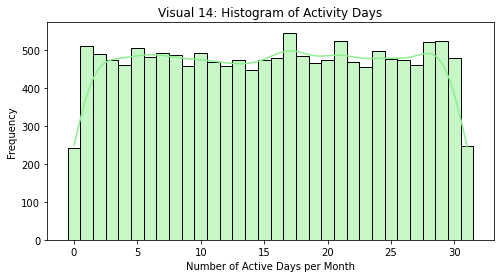

In [21]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['activity_days'], bins=30, kde=True, color='lightgreen', discrete=True)
plt.title('Visual 14: Histogram of Activity Days')
plt.xlabel('Number of Active Days per Month')
plt.ylabel('Frequency')
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

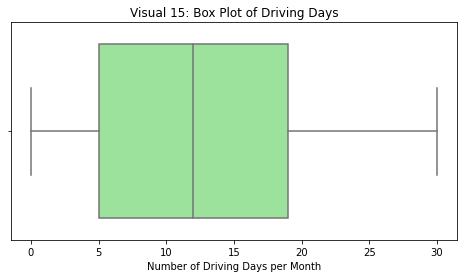

In [22]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['driving_days'], color='lightgreen')
plt.title('Visual 15: Box Plot of Driving Days')
plt.xlabel('Number of Driving Days per Month')
plt.show()

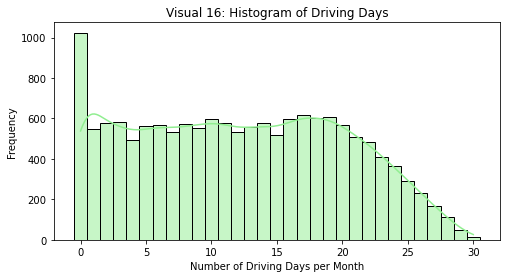

In [23]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['driving_days'], bins=31, kde=True, color='lightgreen', discrete=True)
plt.title('Visual 16: Histogram of Driving Days')
plt.xlabel('Number of Driving Days per Month')
plt.ylabel('Frequency')
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

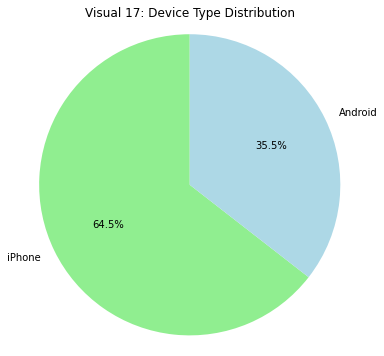

In [24]:
# Pie chart
# Count values for each device type
device_counts = df['device'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=['#90ee90', '#add8e6'])
plt.title('Visual 17: Device Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

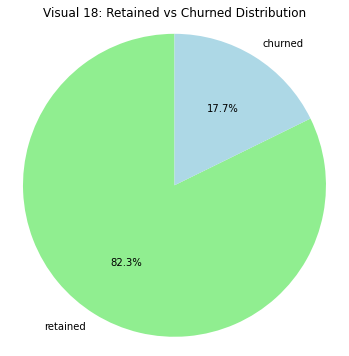

In [25]:
# Pie chart
# Count values for label (retained vs churned)
retained_vs_churned = df['label'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(retained_vs_churned, labels=retained_vs_churned.index, autopct='%1.1f%%', startangle=90, colors=['#90ee90', '#add8e6'])
plt.title('Visual 18: Retained vs Churned Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.savefig("visuals/pie_churn_status.png", dpi=300, facecolor="white")
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

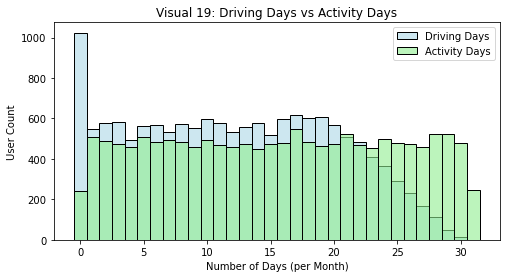

In [26]:
# Histogram
plt.figure(figsize=(8, 4))

# Histogram für driving_days
sns.histplot(df['driving_days'], bins=31, discrete=True, color='lightblue', label='Driving Days', alpha=0.6)

# Histogram für activity_days
sns.histplot(df['activity_days'], bins=31, discrete=True, color='lightgreen', label='Activity Days', alpha=0.6)

plt.title('Visual 19: Driving Days vs Activity Days')
plt.xlabel('Number of Days (per Month)')
plt.ylabel('User Count')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [27]:
df.describe()
#Maximum number of driving_days is 30 and activity_days is 31.

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

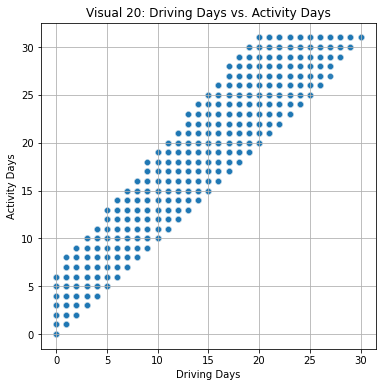

In [28]:
# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['driving_days'], y=df['activity_days'], alpha=0.6)
plt.title('Visual 20: Driving Days vs. Activity Days')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')
plt.grid(True)
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

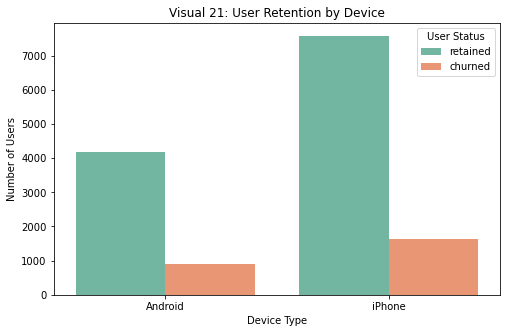

In [29]:
# Histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='device', hue='label', palette='Set2')
plt.title('Visual 21: User Retention by Device')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.legend(title='User Status')
plt.savefig("visuals/bar_retention_device.png", dpi=300, facecolor="white")
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [30]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [31]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days'].replace(0, np.nan)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    13975.000000
mean       621.385885
std       1054.745242
min          3.022063
25%        159.218602
50%        297.055428
75%        592.839874
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

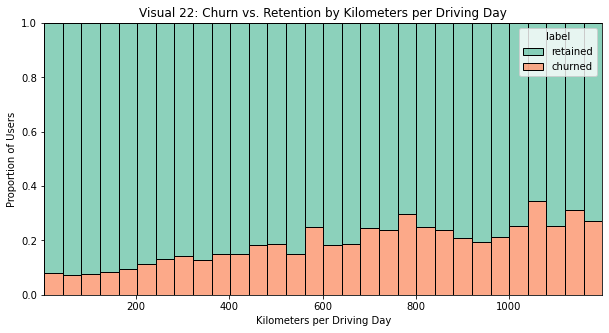

In [32]:
# Histogram
filtered_df = df[df['km_per_driving_day'] <= 1200]

plt.figure(figsize=(10, 5))
sns.histplot(
    data=filtered_df,
    x='km_per_driving_day',
    hue='label',
    multiple='fill',     # zeigt relative Anteile je Balken
    bins=30,
    palette='Set2'
)
plt.title('Visual 22: Churn vs. Retention by Kilometers per Driving Day')
plt.xlabel('Kilometers per Driving Day')
plt.ylabel('Proportion of Users')
plt.savefig("visuals/hist_km_per_day_churn.png", dpi=300, facecolor="white")
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

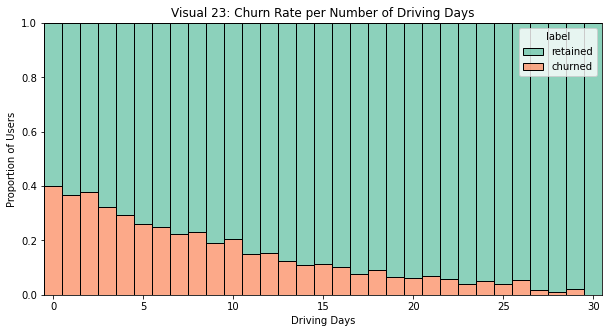

In [33]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='driving_days',
    hue='label',
    multiple='fill',     # zeigt relative Anteile je Balken
    discrete=True,       # wichtig, da driving_days diskret (0–30) ist
    palette='Set2'
)
plt.title('Visual 23: Churn Rate per Number of Driving Days')
plt.xlabel('Driving Days')
plt.ylabel('Proportion of Users')
plt.savefig("visuals/hist_driving_days_churn.png", dpi=300, facecolor="white")
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [34]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [35]:
df['percent_sessions_in_last_month'].describe()
#The median value is 0.423097, or approximately 42.3%.

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

Now, create a histogram depicting the distribution of values in this new column.

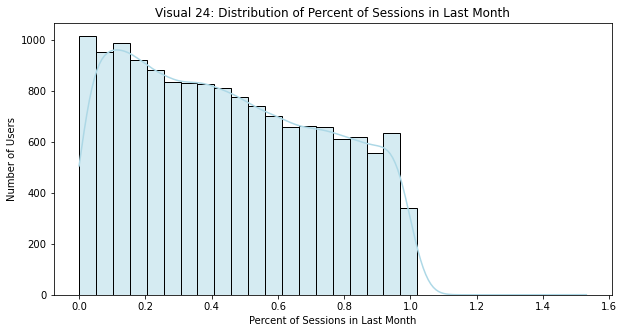

In [36]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['percent_sessions_in_last_month'], bins=30, kde=True, color='lightblue')
plt.title('Visual 24: Distribution of Percent of Sessions in Last Month')
plt.xlabel('Percent of Sessions in Last Month')
plt.ylabel('Number of Users')
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [37]:
df['n_days_after_onboarding'].describe()
#The median value is 1741.

count    14999.000000
mean      1749.837789
std       1008.513876
min          4.000000
25%        878.000000
50%       1741.000000
75%       2623.500000
max       3500.000000
Name: n_days_after_onboarding, dtype: float64

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

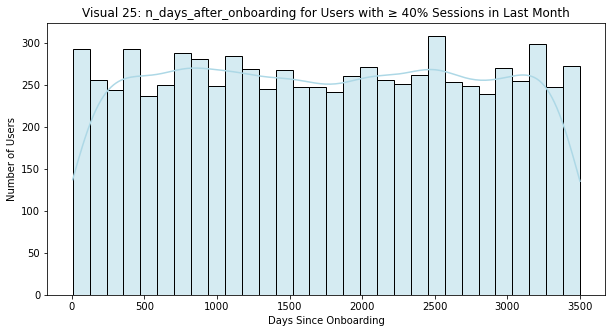

In [38]:
# Histogram
# 1. Filter users with 40% or more sessions in the last month
filtered_df = df[df['percent_sessions_in_last_month'] >= 0.40]

# 2. Plot histogram of n_days_after_onboarding
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['n_days_after_onboarding'], bins=30, kde=True, color='lightblue')
plt.title('Visual 25: n_days_after_onboarding for Users with ≥ 40% Sessions in Last Month')
plt.xlabel('Days Since Onboarding')
plt.ylabel('Number of Users')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### Outlier Handling

Several variables showed right-skewed distributions with high outliers. These are not errors but may distort summary statistics.  
We capped values above the 95th percentile to reduce the impact of extreme values.


In [39]:
def cap_at_95th_percentile(df, column_name):
    """
    Caps all values in a given column above the 95th percentile
    with the value at the 95th percentile.
    """
    percentile_95 = df[column_name].quantile(0.95)
    df[column_name] = np.where(df[column_name] > percentile_95, percentile_95, df[column_name])
    return df

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [40]:
cap_at_95th_percentile(df, 'sessions')
cap_at_95th_percentile(df, 'drives')
cap_at_95th_percentile(df, 'total_sessions')
cap_at_95th_percentile(df, 'driven_km_drives')
cap_at_95th_percentile(df, 'duration_minutes_drives')


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,243.0,201.0,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133.0,107.0,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114.0,95.0,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,3,retained,49.0,40.0,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,4,retained,84.0,68.0,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60.0,55.0,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0.288634
14995,14995,retained,42.0,35.0,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0.223797
14996,14996,retained,243.0,201.0,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,0.646893
14997,14997,churned,149.0,120.0,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0.825374


Call `describe()` to see if your change worked.

In [41]:
print("sessions:")
print(df['sessions'].describe())
print("\ndrives:")
print(df['drives'].describe())
print("\ntotal_sessions:")
print(df['total_sessions'].describe())
print("\ndriven_km_drives:")
print(df['driven_km_drives'].describe())
print("\nduration_minutes_drives:")
print(df['duration_minutes_drives'].describe())

sessions:
count    14999.000000
mean        76.568705
std         67.297958
min          0.000000
25%         23.000000
50%         56.000000
75%        112.000000
max        243.000000
Name: sessions, dtype: float64

drives:
count    14999.000000
mean        64.058204
std         55.306924
min          0.000000
25%         20.000000
50%         48.000000
75%         93.000000
max        201.000000
Name: drives, dtype: float64

total_sessions:
count    14999.000000
mean       184.031320
std        118.600463
min          0.220211
25%         90.661156
50%        159.568115
75%        254.192341
max        454.363204
Name: total_sessions, dtype: float64

driven_km_drives:
count    14999.000000
mean      3939.632764
std       2216.041510
min         60.441250
25%       2212.600607
50%       3493.858085
75%       5289.861262
max       8889.794236
Name: driven_km_drives, dtype: float64

duration_minutes_drives:
count    14999.000000
mean      1789.647426
std       1222.705167
min         1

#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### Final Insights & Visualization Review

The final visualizations revealed key churn patterns by user activity, session intensity, and driving frequency.  
Visual design focused on readability, contrast, and clarity to support business interpretation.

I have learned that churned users often drive fewer days but cover more distance per day. Users with over 40% of their total sessions in the last month tend to be newer and possibly at risk of churn.

My other questions are: Do long-distance drivers churn more due to cost or usage fatigue?

My client would likely want to know which user behaviors predict churn, and how they can retain users who show early signs of leaving.

Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

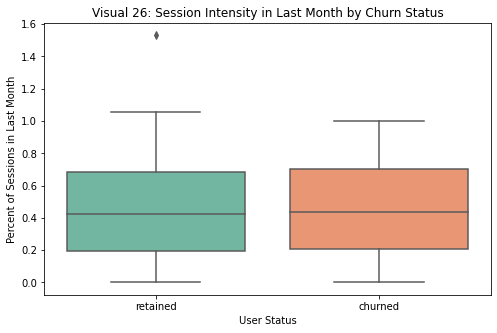

In [42]:
#1. Compare percent_sessions_in_last_month by churn label

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='percent_sessions_in_last_month', palette='Set2')
plt.title('Visual 26: Session Intensity in Last Month by Churn Status')
plt.xlabel('User Status')
plt.ylabel('Percent of Sessions in Last Month')
plt.show()

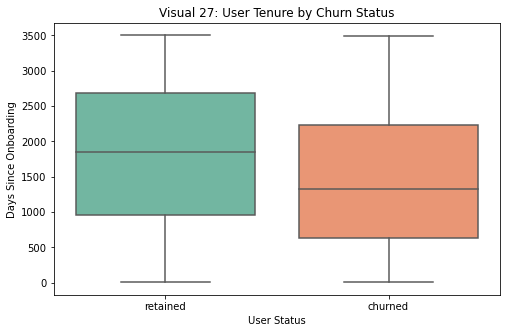

In [43]:
#2. Compare n_days_after_onboarding by churn label

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='n_days_after_onboarding', palette='Set2')
plt.title('Visual 27: User Tenure by Churn Status')
plt.xlabel('User Status')
plt.ylabel('Days Since Onboarding')
plt.show()

### Final interpretation

The final analysis highlighted distributions, trends, and patterns related to user churn.  
These insights support the executive summary and can guide further investigation into long-term retention factors.


1. Many variables were right-skewed with valid high outliers, indicating most users are moderately active while a few are extremely active.
2. Outliers were extreme but explainable. Values like 15,000 km/day were capped at the 95th percentile.
3. Questions to further investigate: Are users with high distance per day churning due to cost or app limitations? Is churn linked to navigation patterns?
4. df['label'].value_counts(normalize=True): 17.7% churned, 82.3% were retained.
5. Fewer driving days, higher distance per day, and a high share of sessions in the last month were all linked to higher churn.
6. Churned users had lower n_days_after_onboarding on average, suggesting many were new.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

In [47]:
df.to_csv("waze_data.csv", index=False)